## **Constraint Satisfaction Problem (CSP)**
Satisfacción de restricciones conocido como problema de coloreo de grafos.

**Componentes del CSP en este problema:**

- **Variables:** Los estados y territorios de Australia.
- **Dominio de cada variable:** Los colores que puedes asignar a cada estado (rojo, verde y azul).
- **Restricciones:** Dos estados vecinos no pueden tener el mismo color.

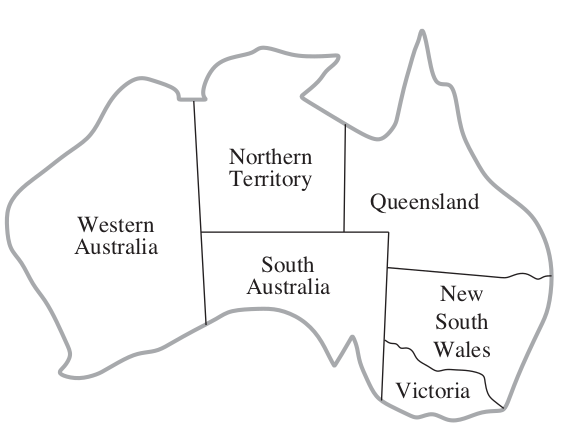

In [3]:
"""
Código visto en clase con implementación de Backtracking. Una vez haya identificado las variables, restricciones
y dominios implemente la solución reemplazando las partes que tienen #TODO
"""

VARIABLES = ["Westerns_Australia", "Northern_Territory", "South_Australia", "Queensland", "New_South_Wales", "Victoria"]
CONSTRAINTS = [
    ("Westerns_Australia", "Northern_Territory"),
    ("Westerns_Australia", "South_Australia"),
    ("Northern_Territory", "South_Australia"),
    ("Northern_Territory", "Queensland"),
    ("South_Australia", "Queensland"),
    ("South_Australia", "New_South_Wales"),
    ("South_Australia", "Victoria"),
    ("Queensland", "New_South_Wales"),
    ("New_South_Wales", "Victoria")
]


def backtrack(assignment):
    """Runs backtracking search to find an assignment."""

    # Check if assignment is complete
    if len(assignment) == len(VARIABLES):
        return assignment

    # Try a new variable
    var = select_unassigned_variable(assignment)
    for value in ["Rojo", "Verde", "Azul"]:
        new_assignment = assignment.copy()
        new_assignment[var] = value
        if consistent(new_assignment):
            result = backtrack(new_assignment)
            if result is not None:
                return result
    return None


def select_unassigned_variable(assignment):
    """Chooses a variable not yet assigned, in order."""
    for variable in VARIABLES:
        if variable not in assignment:
            return variable
    return None


def consistent(assignment):
    """Checks to see if an assignment is consistent."""
    for (x, y) in CONSTRAINTS:

        # Only consider arcs where both are assigned
        if x not in assignment or y not in assignment:
            continue

        # If both have same value, then not consistent
        if assignment[x] == assignment[y]:
            return False

    # If nothing inconsistent, then assignment is consistent
    return True


solution = backtrack(dict())
print(solution)

{'Westerns_Australia': 'Rojo', 'Northern_Territory': 'Verde', 'South_Australia': 'Azul', 'Queensland': 'Rojo', 'New_South_Wales': 'Verde', 'Victoria': 'Rojo'}
